####  Loading Libraries

In [ ]:
library(Boruta)
library(caret)
library(randomForest)
library(e1071)

In [30]:
library(Boruta)

Warning message:
"package 'Boruta' was built under R version 3.4.4"Loading required package: ranger
Warning message:
"package 'ranger' was built under R version 3.4.4"
Attaching package: 'ranger'

The following object is masked from 'package:randomForest':

    importance



#### Importing the Data

In [1]:
data<-read.csv('data2.csv')


In [46]:
#Viewing The data
#head(data,20)

In [11]:
#Viewing The Variables
str(data)

#### Finding Factor Variables

In [12]:
lapply(data,function(x)unique(x))

In [13]:
lapply(data,function(x)length(unique(x)))

In [1]:
#summary(data)

From the summary above,it is observed that age has a minimum of 0 which gives an evidence that there are errors in the source of the data.We also have encoded factors. The next step is to transform the classes of some of the variables into factors.

#### Changing Variables To Factors

In [ ]:
f <- c('def','inc_brac4','inc_brac3','inc_brac2','inc_brac1','income_missing','kin_missing','credit_score_m')
factrs <-as.data.frame(lapply(data[,f],as.factor))

In [15]:
class(factrs$inc_brac4)

[1] "factor"

##### Checking the converted factors

In [2]:
#head(factrs)

#### Selecting numeric variables

In [8]:
df <-subset(data,select=-c(def,inc_brac4,inc_brac3,inc_brac2,
                           inc_brac1,income_missing,
                           kin_missing,credit_score_m))

#### Combinig Factor Variables with numeric variables and removing the row with an empty set

In [9]:
combined_data <- na.omit(cbind.data.frame
                         (factrs,df))

In [21]:
#Printing The new data
head(combined_data)

,def,inc_brac4,inc_brac3,inc_brac2,inc_brac1,income_missing,kin_missing,credit_score_m,age,credit_score_avg,...,exp.inc,rec_exp_r,d_exp_r,inc_exp_r,t_exp_r,w_exp_r,s_exp_r,p_exp_r,a_exp_r,total_sent
2,1,0,0,0,1,0,0,1,26,0.00,...,2340.286,0.4201884,0.1351681,0.5553565,0.4306924,0.2545938,0.27595473,0.0271422,0.01161686,41757.321
3,0,0,0,0,0,1,1,0,29,16.06,...,0.000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.00000000,0.0000000,0.00000000,0.000
4,1,0,0,0,0,1,1,0,46,0.00,...,0.000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.00000000,0.0000000,0.00000000,0.000
5,0,0,0,0,1,0,0,1,47,0.00,...,0.000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.00000000,0.0000000,0.00000000,0.000
6,0,0,0,0,0,0,0,1,29,0.00,...,1467.143,0.6893527,0.0000000,0.6893527,0.0000000,0.9376891,0.06231095,0.0000000,0.00000000,8460.714
7,1,0,0,0,0,1,1,0,23,14.32,...,0.000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.00000000,0.0000000,0.00000000,0.000


#### Getting Correlation of Numerical Variables

In [21]:
numerical_vars <-cor(combined_data[,9:ncol(combined_data)])
numerical_vars

,age,credit_score_avg,credit_score,deposit_min_avg,deposit_max_avg,total_deposit,monthly_deposit_avg,min_rec_avg,max_rec_avg,total_rec,...,exp.inc,rec_exp_r,d_exp_r,inc_exp_r,t_exp_r,w_exp_r,s_exp_r,p_exp_r,a_exp_r,total_sent
age,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
credit_score_avg,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
credit_score,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
deposit_min_avg,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
deposit_max_avg,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
total_deposit,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
monthly_deposit_avg,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
min_rec_avg,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
max_rec_avg,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
total_rec,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE


#### Reducing Multicollinearity

In [17]:
correlated_vars <-findCorrelation(numerical_vars,cutoff =.75)
correlated_vars

[1] 40  9 12 36 11 10  5 37 17 18  6 21 28 27 41 42 26 32 22 38  3 44

#### Creating a dataframe of the numerical variables

In [18]:
numerical_df <- combined_data[,9:ncol(combined_data)]

In [19]:
head(numerical_df[,correlated_vars])

,monthly_exp_avg,max_rec_avg,avg_monthly_inc,avg_max_sent,monthly_rec_avg,total_rec,deposit_max_avg,avg_monthly_sent,total_airtime,monthly_airtime_avg,...,avg_monthly_transferred,total_transfered,inc.exp,exp.inc,avg_max_transfered,avg_withdrawls,total_paybill,s_inc_r,credit_score,d_exp_r
2,5263.286,914.2857,2923.000,381.4286,2211.571,15481,385.7143,1452.4286,428,61.14286,...,2266.857,15868,-2340.286,2340.286,464.4286,1340.000,1000,0.49689653,0,0.1351681
3,0.000,0.0000,0.000,0.0000,0.000,0,0.0000,0.0000,0,0.00000,...,0.000,0,0.000,0.000,0.0000,0.000,0,0.00000000,803,0.0000000
4,0.000,0.0000,0.000,0.0000,0.000,0,0.0000,0.0000,0,0.00000,...,0.000,0,0.000,0.000,0.0000,0.000,0,0.00000000,0,0.0000000
5,0.000,0.0000,0.000,0.0000,0.000,0,0.0000,0.0000,0,0.00000,...,0.000,0,0.000,0.000,0.0000,0.000,0,0.00000000,0,0.0000000
6,4722.857,2671.4286,3255.714,294.2857,3255.714,22790,0.0000,294.2857,0,0.00000,...,0.000,0,-1467.143,1467.143,0.0000,4428.571,0,0.09039052,0,0.0000000
7,0.000,0.0000,0.000,0.0000,0.000,0,0.0000,0.0000,0,0.00000,...,0.000,0,0.000,0.000,0.0000,0.000,0,0.00000000,716,0.0000000


#### Getting the uncorrelated numerical variables

In [23]:
numerical_uncorr <- numerical_df[,-correlated_vars]

#### Getting the factors

In [21]:
separeted_factrs<-combined_data[,1:8]

#### Combining the numerical and factor variables

In [24]:
final_dataset <- cbind.data.frame(separeted_factrs,numerical_uncorr)

In [30]:
final_dataset

,def,inc_brac4,inc_brac3,inc_brac2,inc_brac1,income_missing,kin_missing,credit_score_m,age,credit_score_avg,...,avg_min_sent,s_rec_r,rec_exp_r,inc_exp_r,t_exp_r,w_exp_r,s_exp_r,p_exp_r,a_exp_r,total_sent
2,1,0,0,0,1,0,0,1,26,0.00,...,2.0000000,0.49689653,0.4201884,0.5553565,0.430692397,0.25459382,0.27595473,0.027142198,0.01161686,41757.321
3,0,0,0,0,0,1,1,0,29,16.06,...,0.0000000,0.00000000,0.0000000,0.0000000,0.000000000,0.00000000,0.00000000,0.000000000,0.00000000,0.000
4,1,0,0,0,0,1,1,0,46,0.00,...,0.0000000,0.00000000,0.0000000,0.0000000,0.000000000,0.00000000,0.00000000,0.000000000,0.00000000,0.000
5,0,0,0,0,1,0,0,1,47,0.00,...,0.0000000,0.00000000,0.0000000,0.0000000,0.000000000,0.00000000,0.00000000,0.000000000,0.00000000,0.000
6,0,0,0,0,0,0,0,1,29,0.00,...,294.2857143,0.09039052,0.6893527,0.6893527,0.000000000,0.93768905,0.06231095,0.000000000,0.00000000,8460.714
7,1,0,0,0,0,1,1,0,23,14.32,...,0.0000000,0.00000000,0.0000000,0.0000000,0.000000000,0.00000000,0.00000000,0.000000000,0.00000000,0.000
8,1,0,0,0,1,0,0,1,21,0.00,...,82.4285714,0.13037241,1.2357361,1.3093058,0.004539407,0.74962824,0.17069735,0.038350160,0.03678485,8957.679
9,1,0,0,0,0,1,1,0,24,0.00,...,0.0000000,0.00000000,0.0000000,0.0000000,0.000000000,0.00000000,0.00000000,0.000000000,0.00000000,0.000
10,0,0,0,0,0,1,1,0,26,14.36,...,108.4285714,0.62567010,0.6014946,0.9822387,0.072604654,0.26004010,0.61455739,0.040666707,0.01213115,124631.250
11,1,0,0,0,0,1,1,0,23,0.00,...,0.0000000,0.00000000,0.0000000,0.0000000,0.000000000,0.00000000,0.00000000,0.000000000,0.00000000,0.000


# Variable Selection

### Variable Ranking Using Boruta

In [32]:
#Variable Ranking with Boruta
set.seed(1245)
rank_vars_bo <- Boruta(def~.,data = final_dataset,maxRuns=11,doTrace=1)

In [34]:
rank_vars_bo

Boruta performed 10 iterations in 2.039783 mins.
 No attributes deemed important.
 No attributes deemed unimportant.
 36 tentative attributes left: a_exp_r, a_inc_r, age, airtime_max_avg,
airtime_min_avg and 31 more;

In [36]:
#Completing Boruta Ranking
final_bor <-TentativeRoughFix(rank_vars_bo)
final_bor

Boruta performed 10 iterations in 2.039783 mins.
Tentatives roughfixed over the last 10 iterations.
 10 attributes confirmed important: a_inc_r, airtime_max_avg,
airtime_min_avg, avg_min_paybill, d_inc_r and 5 more;
 26 attributes confirmed unimportant: a_exp_r, age, avg_min_sent,
avg_min_transfered, avg_min_withdrawals and 21 more;

In [37]:
#Getting the final fitting variables
finalfitting_vars_bo <- getSelectedAttributes(final_bor)

In [38]:
finalfitting_vars_bo

[1] "monthly_deposit_avg" "min_rec_avg"         "rec_inc_r"          
 [4] "d_inc_r"             "airtime_min_avg"     "airtime_max_avg"    
 [7] "a_inc_r"             "avg_min_paybill"     "p_inc_r"            
[10] "w_exp_r"

### creating a dataframe of the important variables + Response

In [44]:
final_data_set_bo<-c('def',finalfitting_vars_bo)
data_imp <- final_dataset[,final_data_set_bo]
#data_imp

# Variable Ranking Using Random Forest

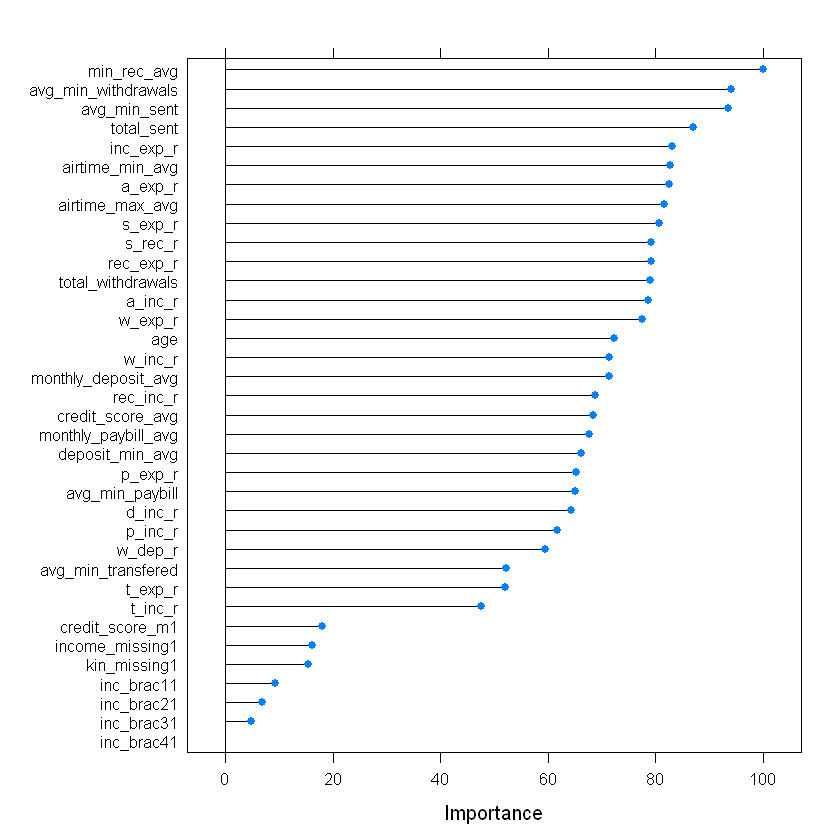

In [29]:
set.seed(189)
rf_var_imp<-train(def~.,data=final_dataset,method='rf',metric='Accuracy',
                 trControl=trainControl(method="cv",number=5))
final_data_set_rf=varImp(rf_var_imp)
plot(final_data_set_rf)

In [45]:
#Removing the least important variables with random forest
final_data_set_rf<-subset(final_dataset, select=-c
                          (inc_brac4,credit_score_m,
                           income_missing,kin_missing,
                           inc_brac1,inc_brac2,inc_brac3))

# Model Training

#### Creating the training and testing dataset

In [47]:
index<- createDataPartition(final_data_set_rf$def,p=.8,list=F)
training_data_set<-final_data_set_rf[index,]
testing_data_set<-final_data_set_rf[-index,]

In [48]:
#Checking for Imbalance
summary(testing_data_set$def)

0   1 
273 447

In [50]:
#Recording the response with characters
levels(training_data_set$def) <-c('non_defaulter','defaulter')
#Recording the response with characters
levels(testing_data_set$def) <-c('non_defaulter','defaulter')

# Model Fitting

In [51]:
#Model Fitting
contrl=trainControl(method='repeatedcv',number=5,repeats=3,p=.80,
                   classProbs=T,savePredictions='final',
                   preProcOptions=c('center','scaling'),
                   summaryFunction=twoClassSummary)

In [52]:
set.seed(565)
fit<- train(def~.,data=training_data_set,preProcess='scale',
            method='rf',metric='ROC',maximise =T,
           sampling='up',trControl=contrl,ntree=1000,tunelength=5)

# Model Evaluation

In [53]:
#Prediction
pred <-predict(fit,newdata=testing_data_set,type='raw')
confusionMatrix(data=pred,reference=testing_data_set$def)

Confusion Matrix and Statistics

               Reference
Prediction      non_defaulter defaulter
  non_defaulter            85        77
  defaulter               188       370
                                          
               Accuracy : 0.6319          
                 95% CI : (0.5955, 0.6673)
    No Information Rate : 0.6208          
    P-Value [Acc > NIR] : 0.283           
                                          
                  Kappa : 0.151           
 Mcnemar's Test P-Value : 1.406e-11       
                                          
            Sensitivity : 0.3114          
            Specificity : 0.8277          
         Pos Pred Value : 0.5247          
         Neg Pred Value : 0.6631          
             Prevalence : 0.3792          
         Detection Rate : 0.1181          
   Detection Prevalence : 0.2250          
      Balanced Accuracy : 0.5695          
                                          
       'Positive' Class : non_defaulter   
     

# Visualizing One of the RF Trees

In [ ]:
#library(partykit)
x<-ctree(def~.,
        data=training_data_set)

In [ ]:
plot(x,gp=gpar(fontsize=10),
    inner_panel=node_inner,
    ip_args=list(abbreviate= FALSE, id = FALSE))

In [38]:
print(fit)

Random Forest 

2885 samples
  35 predictor
   2 classes: 'non_defaulter', 'defaulter' 

Pre-processing: scaled (35) 
Resampling: Cross-Validated (5 fold, repeated 3 times) 
Summary of sample sizes: 2308, 2309, 2307, 2308, 2308, 2308, ... 
Addtional sampling using up-sampling prior to pre-processing

Resampling results across tuning parameters:

  mtry  ROC        Sens       Spec     
   2    0.6428539  0.4084101  0.7810656
  18    0.6157532  0.4835533  0.6804511
  35    0.5978633  0.5136640  0.6245596

ROC was used to select the optimal model using the largest value.
The final value used for the model was mtry = 2.


# Tuning The Model

In [55]:
#Tuning the mTry parameter
set.seed(1004)
tuneGrid <-expand.grid(.mTry= c(1:5))
rf_mtry <- train(def~.,
                data =training_data_set,
                method = 'rf',
                metric ='ROC',
                maximise= T,
                tuneGrind =tuneGrid,
                trControl =contrl
                )
print(rf_mtry)

Random Forest 

2885 samples
  29 predictor
   2 classes: 'non_defaulter', 'defaulter' 

No pre-processing
Resampling: Cross-Validated (5 fold, repeated 3 times) 
Summary of sample sizes: 2308, 2308, 2308, 2308, 2308, 2308, ... 
Resampling results across tuning parameters:

  mtry  ROC        Sens       Spec     
   2    0.6269453  0.3077958  0.8295302
  15    0.6300950  0.3324312  0.8015790
  29    0.6122698  0.4078650  0.7203334

ROC was used to select the optimal model using the largest value.
The final value used for the model was mtry = 15.


In [54]:
plot(rf_mtry)

ERROR: Error in plot(rf_mtry): object 'rf_mtry' not found


In [40]:
#Finding the best Tree
store_maxtrees <-list()
for (ntree in c(300,400,500,600,700)){
    set.seed(50038)
    rf_maxtrees <- train(def~.,
                        data = training_data_set,
                        method="rf",
                        metric="ROC",
                        tuneGrid= expand.grid(.mtry=2),
                        trControl = contrl,
                        importance = TRUE,
                        ntree = ntree)
    key<- toString(ntree)
    store_maxtrees[[key]] <-rf_maxtrees}
results_tree<-resamples(store_maxtrees)
summary(results_tree)


Call:
summary.resamples(object = results_tree)

Models: 300, 400, 500, 600, 700 
Number of resamples: 15 

ROC 
         Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
300 0.6070190 0.6262563 0.6395819 0.6408661 0.6494284 0.6868001    0
400 0.6067766 0.6311287 0.6388230 0.6412532 0.6493779 0.6885539    0
500 0.6090023 0.6320151 0.6387528 0.6418587 0.6510055 0.6876993    0
600 0.6085878 0.6322575 0.6381470 0.6416706 0.6507024 0.6879034    0
700 0.6099526 0.6321841 0.6373921 0.6414782 0.6500898 0.6876547    0

Sens 
         Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
300 0.3333333 0.3767123 0.4018265 0.3989941 0.4246575 0.4636364    0
400 0.3424658 0.3767123 0.4063927 0.3968659 0.4155251 0.4590909    0
500 0.3378995 0.3789954 0.4018265 0.3983838 0.4178082 0.4681818    0
600 0.3424658 0.3721461 0.3972603 0.3986841 0.4223744 0.4681818    0
700 0.3470320 0.3698630 0.4018265 0.4014197 0.4223744 0.4727273    0

Spec 
         Min.   1st Qu.    Median      Mean  

In [56]:
#Fitting the Final Model
final_fit<- train(def~.,data=training_data_set,preProcess='scale',
                  method='rf',metric='ROC',
           maximise =T,
           trControl=contrl,
            ntree=500,
            tuneGrid = expand.grid(.mtry = 2),
            tunelength = 5)

In [59]:
final_fit

Random Forest 

2885 samples
  29 predictor
   2 classes: 'non_defaulter', 'defaulter' 

Pre-processing: scaled (29) 
Resampling: Cross-Validated (5 fold, repeated 3 times) 
Summary of sample sizes: 2307, 2308, 2308, 2309, 2308, 2308, ... 
Resampling results:

  ROC        Sens       Spec     
  0.6269474  0.3047461  0.8205556

Tuning parameter 'mtry' was held constant at a value of 2

In [57]:
pred <- predict(final_fit, newdata= testing_data_set,type="raw")
confusionMatrix(data=pred, reference=testing_data_set$def)

Confusion Matrix and Statistics

               Reference
Prediction      non_defaulter defaulter
  non_defaulter            83        71
  defaulter               190       376
                                          
               Accuracy : 0.6375          
                 95% CI : (0.6012, 0.6727)
    No Information Rate : 0.6208          
    P-Value [Acc > NIR] : 0.1887          
                                          
                  Kappa : 0.1587          
 Mcnemar's Test P-Value : 2.793e-13       
                                          
            Sensitivity : 0.3040          
            Specificity : 0.8412          
         Pos Pred Value : 0.5390          
         Neg Pred Value : 0.6643          
             Prevalence : 0.3792          
         Detection Rate : 0.1153          
   Detection Prevalence : 0.2139          
      Balanced Accuracy : 0.5726          
                                          
       'Positive' Class : non_defaulter   
     

In [58]:
#Saving The Model to be used in the API
save(final_fit,file="rf_creditscoring_model.RDATA")